Assuming Raoult's law to be valid, prepare a *Pxy* diagram for a temperature of 75 °C for one of the following systems:

(a) Acetonitrile (1)/Nitromethane (2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Xl = np.linspace(0,1,100)
X2 = 1-Xl

In [2]:
# Defining antoine constants
ANT_Acetonitrile = [14.8950,3413.10,-22.627]
ANT_Nitromethane = [14.7513,3331.70,-45.550]

In [3]:
def Psat1(T):
    return np.exp(ANT_Acetonitrile[0]-ANT_Acetonitrile[1]/(T+ANT_Acetonitrile[2]))
Psat1(348.15)

82.27165091238044

In [4]:
def Psat2(T):
    return np.exp(ANT_Nitromethane[0]-ANT_Nitromethane[1]/(T+ANT_Nitromethane[2]))
Psat2(348.15)

42.14244606060848

In [5]:
Total_Pressure = Xl*Psat1(348.15) + X2*Psat2(348.15)
y1 = Xl*Psat1(348.15)/Total_Pressure

In [6]:
# For Dew Points
Total_Pressure_Dew = 1/(Xl/Psat1(348.15)+X2/Psat2(348.15))

In [7]:
x1 = Xl*Total_Pressure_Dew/Psat1(348.15)

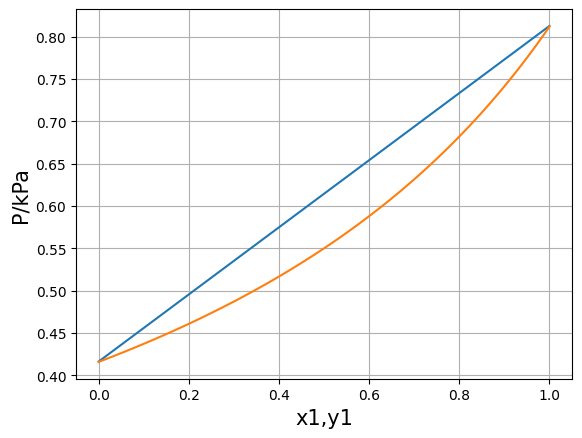

In [8]:
plt.plot(Xl,Total_Pressure/101.235)
plt.plot(Xl,Total_Pressure_Dew/101.325)
plt.xlabel('x1,y1',fontsize = 15)
plt.ylabel('P/kPa',fontsize = 15)
# plt.legend()
plt.grid()
plt.show()

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = pd.read_csv('34 VLE Dwsim Data.csv', header = None)

# Calling DWSIM dataset
data.head()

,0,1,2,3
0,0.000,0.429665,0.000,0.429665
1,0.025,0.439642,0.025,0.434900
2,0.050,0.449620,0.050,0.440265
3,0.075,0.459597,0.075,0.445764
4,0.100,0.469575,0.100,0.451402


In [10]:
# Defining headers as variables
X_Acetonitrile = data[0]
Bubble_Points = data[1]
Y_Acetonitrile = data[2]
Dew_Points = data[3]

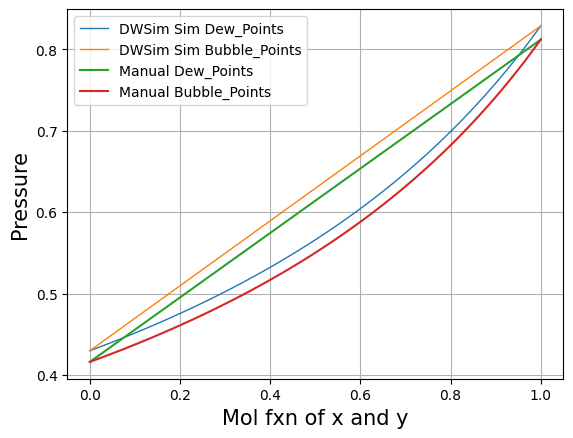

In [12]:
# Making plots
plt.plot(X_Acetonitrile, Dew_Points,lw = 1,label = "DWSim Sim Dew_Points")
plt.plot(Y_Acetonitrile, Bubble_Points,lw = 1,label = "DWSim Sim Bubble_Points")
plt.plot(Xl,Total_Pressure/101.32,label = "Manual Dew_Points")
plt.plot(Xl,Total_Pressure_Dew/101.32,label = "Manual Bubble_Points")
plt.xlabel("Mol fxn of x and y", fontsize = 15)
plt.ylabel("Pressure",fontsize = 15)
plt.grid()
plt.legend()
plt.show()